In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

paddlex使用

得分点：
* 1、能够完成示例模型的训练、验证、导出模型、预测过程。30分
* 2、能够使用vdl展示模型精度变化过程和训练过程中数据情况。 30分
* 3、能够进行2-3种模型优化操作。15分
* 4、最终项目能够上传github。15

# 1. 安装paddlex

In [1]:
! pip install paddlex==2.0.0

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.2/944.2 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 KB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 KB 40.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 KB 37.1 MB/s eta 0:00:00
  Created wheel for lap: filename=lap-0.4.0-cp37-cp37m-linux_x86_64.whl size=1593880 sha256=eed1f00b086a3bb1e2565d198f3d22564c0fe9a15c4e9156e370bb136b7eea34
  Stored in directory: /h

查看环境

In [1]:
import paddle
import paddlex as pdx
from paddlex import transforms

print('paddle\'s version is:{}'.format(paddle.__version__))
print('paddlex\'s version is:{}'.format(pdx.__version__))

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/distributed/parallel.py:136: UserWarning: Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything.
  "Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything."


[04-10 14:57:18 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: Depreca

paddle's version is:2.2.2
paddlex's version is:2.0.0


# 2 数据集加载集预处理

In [3]:
! unzip /home/aistudio/data/data117406/dataset_reinforcing_steel_bar_counting.zip -d data/
!mv data/dataset_reinforcing_steel_bar_counting/ data/dataset

Archive:  /home/aistudio/data/data117406/dataset_reinforcing_steel_bar_counting.zip
   creating: data/dataset_reinforcing_steel_bar_counting/
  inflating: data/dataset_reinforcing_steel_bar_counting/.DS_Store  
  inflating: data/dataset_reinforcing_steel_bar_counting/labels.txt  
   creating: data/dataset_reinforcing_steel_bar_counting/Annotations/
   creating: data/dataset_reinforcing_steel_bar_counting/JPEGImages/
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/1E45CAAA.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/3EA15847.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/B109F092.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/EDB2FA69.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/46D2A288.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/02EDEB01.xml  
  inflating: data/dataset_reinforcing_steel_bar_counting/Annotations/01D4FEF

## 2.1 数据集处理

划分数据集，验证集占比0.2，测试集适当定义即可，训练集：验证集(测试集)建议7:3

In [2]:
# 设置使用0号GPU卡（如无GPU，执行此代码后仍然会使用CPU训练模型）
import matplotlib
matplotlib.use('Agg') 
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
!paddlex --split_dataset --format VOC --dataset_dir ./data/dataset/ --val_value 0.2 --test_value 0.1
# --split_dataset --format VOC --dataset_dir /home/aistudio/data/dataset/--val_value 0.2 --test_value 0.1

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/distributed/parallel.py:136: UserWarning: Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything.
  "Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything."
[04-10 13:19:32 MainThread @logger.py:242] Argv: /opt/conda/envs/python35-paddle120-env/bin/paddlex --split_dataset --format VOC --dataset_dir ./data/dataset/ --val_value 0.2 --test_value 0.1
[04-10 13:19:32 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_s

In [5]:
# 定义训练和验证时的transforms
train_transforms = transforms.Compose([
    transforms.MixupImage(mixup_epoch=-1),
    transforms.RandomDistort(),
    transforms.RandomExpand(),
    transforms.RandomCrop(),
    transforms.Resize(
        target_size=480, interp='RANDOM'),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(),
])

eval_transforms = transforms.Compose([
    transforms.Resize(
        target_size=480, interp='CUBIC'),
    transforms.Normalize(),
])
# 定义训练集与验证集
train_dataset =  pdx.datasets.VOCDetection(
    data_dir='data/dataset',
    file_list='data/dataset/train_list.txt',
    label_list='data/dataset/labels.txt',
    transforms=train_transforms,
    shuffle=True
)
eval_dataset = pdx.datasets.VOCDetection(
    data_dir='data/dataset',
    file_list='data/dataset/val_list.txt',
    label_list='data/dataset/labels.txt',
    transforms=eval_transforms
)

2022-04-10 14:57:49 [INFO]	Starting to read file list from dataset...
2022-04-10 14:57:59 [INFO]	175 samples in file data/dataset/train_list.txt, including 175 positive samples and 0 negative samples.
creating index...
index created!
2022-04-10 14:57:59 [INFO]	Starting to read file list from dataset...
2022-04-10 14:58:01 [INFO]	50 samples in file data/dataset/val_list.txt, including 50 positive samples and 0 negative samples.
creating index...
index created!


## 2.2 初始化与训练
batch_size定义为2，每次训练会执行floor(175/2)个step（主要是为了计算省时间）

In [6]:
num_classes = len(train_dataset.labels)
model = pdx.det.YOLOv3(num_classes=num_classes, backbone='MobileNetV1', label_smooth=True, ignore_threshold=0.7)
model.train(
    num_epochs=5,                     
    train_dataset=train_dataset,         
    eval_dataset=eval_dataset,           
    train_batch_size=2,                  
    pretrain_weights='COCO',             
    learning_rate=0.0001,   
    warmup_steps=1000,                   
    warmup_start_lr=0.0,                                         
    save_interval_epochs=5,              
    lr_decay_epochs=[210, 240],          
    save_dir='output/yolov3_mobilnetv1', 
    use_vdl=True)    

2022-04-10 13:22:58 [INFO]	Loading pretrained model from output/yolov3_mobilnetv1/pretrain/yolov3_mobilenet_v1_270e_coco.pdparams
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.0.weight doesn't match.(Pretrained: [255, 1024, 1, 1], Actual: [18, 1024, 1, 1])
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.0.bias doesn't match.(Pretrained: [255], Actual: [18])
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.1.weight doesn't match.(Pretrained: [255, 512, 1, 1], Actual: [18, 512, 1, 1])
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.1.bias doesn't match.(Pretrained: [255], Actual: [18])
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.2.weight doesn't match.(Pretrained: [255, 256, 1, 1], Actual: [18, 256, 1, 1])
2022-04-10 13:22:58 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.2.bia

In [9]:
num_classes = len(train_dataset.labels)
model = pdx.det.YOLOv3(num_classes=num_classes, backbone='DarkNet53', label_smooth=True, ignore_threshold=0.7)
model.train(
    num_epochs=100,                     
    train_dataset=train_dataset,         
    eval_dataset=eval_dataset,           
    train_batch_size=2,                  
    pretrain_weights='COCO',             
    learning_rate=0.001,              
    warmup_steps=1000,                   
    warmup_start_lr=0.0,                 
    save_interval_epochs=5,              
    lr_decay_epochs=[210, 240],          
    save_dir='output/yolov3_DarkNet53', 
    use_vdl=True)  

2022-04-10 12:45:11 [INFO]	Downloading yolov3_r34_270e_coco.pdparams from https://paddledet.bj.bcebos.com/models/yolov3_r34_270e_coco.pdparams


100%|██████████| 249289/249289 [00:05<00:00, 42989.36KB/s]


2022-04-10 12:45:16 [INFO]	Loading pretrained model from output/yolov3_resnet34/pretrain/yolov3_r34_270e_coco.pdparams
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.0.weight doesn't match.(Pretrained: [255, 1024, 1, 1], Actual: [18, 1024, 1, 1])
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.0.bias doesn't match.(Pretrained: [255], Actual: [18])
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.1.weight doesn't match.(Pretrained: [255, 512, 1, 1], Actual: [18, 512, 1, 1])
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.1.bias doesn't match.(Pretrained: [255], Actual: [18])
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.2.weight doesn't match.(Pretrained: [255, 256, 1, 1], Actual: [18, 256, 1, 1])
2022-04-10 12:45:18 [WARNING]	[SKIP] Shape of pretrained params yolo_head.yolo_output.2.bias doesn't m

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


KeyboardInterrupt: 

# 3 模型预测
预测结果，可知结果不是很好，因为训练次数给定的也不合理。
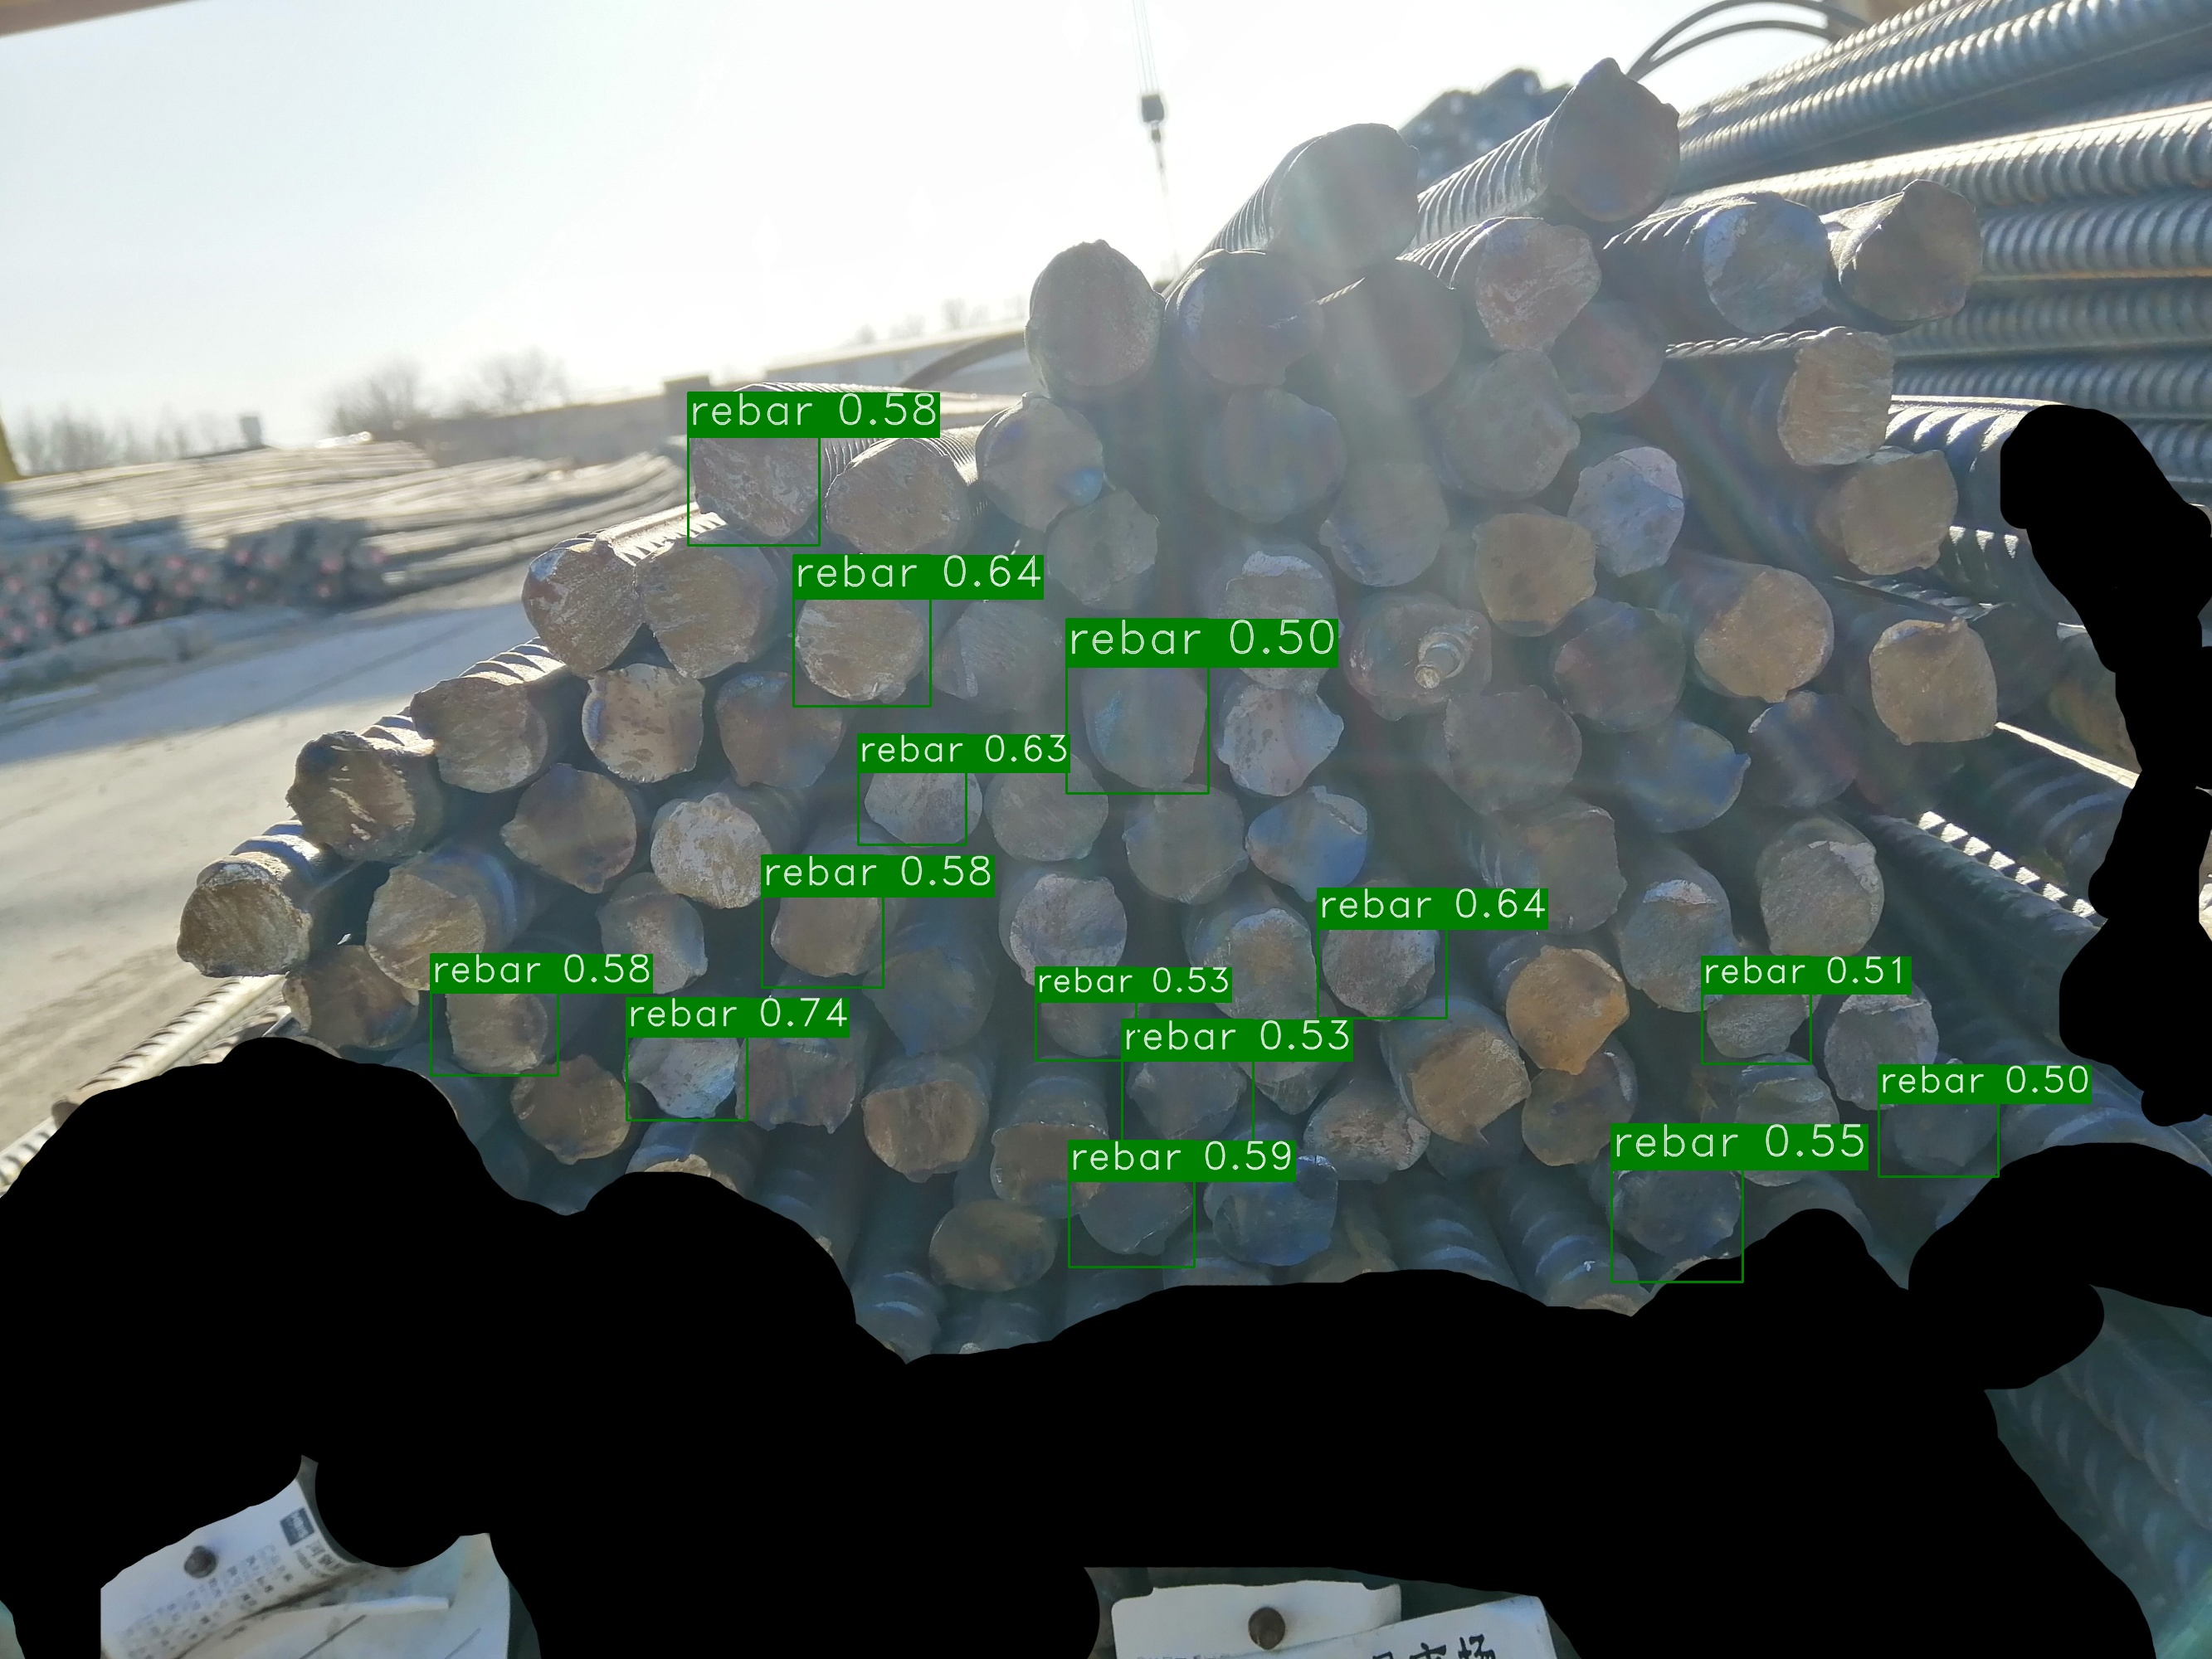

更换backbone，重新训练。

In [7]:
model = pdx.load_model('output/yolov3_mobilnetv1/best_model')
image_name = './data/dataset/JPEGImages/DB8345F7.jpg'
result = model.predict(image_name)
pdx.det.visualize(image_name, result, threshold=0.5,save_dir='./output/DB8345F7')

2022-04-10 13:39:31 [INFO]	Model[YOLOv3] loaded.
2022-04-10 13:39:32 [INFO]	The visualized result is saved at ./output/DB8345F7/visualize_DB8345F7.jpg


In [ ]:
#更换网络重新训练
num_classes = len(train_dataset.labels)
model = pdx.det.YOLOv3(num_classes=num_classes, backbone='DarkNet53')
model.train(
    num_epochs=18,
    train_dataset=train_dataset,
    train_batch_size=8,
    eval_dataset=eval_dataset,
    learning_rate=0.000125,
    lr_decay_epochs=[210, 240],
    save_dir='output/YOLO3_DARKNET53',
    use_vdl=True
)

2022-04-10 13:41:34 [INFO]	Downloading DarkNet53_pretrained.pdparams from https://paddledet.bj.bcebos.com/models/pretrained/DarkNet53_pretrained.pdparams


100%|██████████| 158704/158704 [00:04<00:00, 39053.62KB/s]


2022-04-10 13:41:38 [INFO]	Loading pretrained model from output/YOLO3_DARKNET53/pretrain/DarkNet53_pretrained.pdparams
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv0.conv.weight is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv0.batch_norm.weight is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv0.batch_norm.bias is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv0.batch_norm._mean is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv0.batch_norm._variance is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv1.conv.weight is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv1.batch_norm.weight is not in pretrained model
2022-04-10 13:41:39 [WARNING]	neck.yolo_block.0.conv_module.conv1.batch_norm.bias is not in pretrained model
2022-04

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


2022-04-10 13:42:41 [INFO]	[TRAIN] Epoch=1/18, Step=10/21, loss_xy=276.812592, loss_wh=98.513306, loss_obj=716.387878, loss_cls=58.645966, loss=1150.359741, lr=0.000125, time_each_step=6.13s, eta=0:38:19
2022-04-10 13:43:32 [INFO]	[TRAIN] Epoch=1/18, Step=20/21, loss_xy=285.513489, loss_wh=94.985390, loss_obj=516.268005, loss_cls=37.204956, loss=933.971802, lr=0.000125, time_each_step=5.18s, eta=0:31:31
2022-04-10 13:43:41 [INFO]	[TRAIN] Epoch 1 finished, loss_xy=290.31793, loss_wh=123.54153, loss_obj=1279.7126, loss_cls=51.490032, loss=1745.0619 .
2022-04-10 13:43:41 [WARNING]	Detector only supports single card evaluation with batch_size=1 during evaluation, so batch_size is forcibly set to 1.
2022-04-10 13:43:41 [INFO]	Start to evaluate(total_samples=50, total_steps=50)...
2022-04-10 13:43:44 [INFO]	Accumulating evaluatation results...
2022-04-10 13:43:44 [INFO]	[EVAL] Finished, Epoch=1, bbox_map=0.000000 .
2022-04-10 13:43:46 [INFO]	Model saved in output/YOLO3_DARKNET53/best_model.


In [9]:
model = pdx.load_model('output/YOLO3_DARKNET53/best_model')
image_name = './data/dataset/JPEGImages/DB8345F7.jpg'
result = model.predict(image_name)
pdx.det.visualize(image_name, result, threshold=0.5,save_dir='./output/NEW_DB8345F7')

2022-04-10 14:18:26 [INFO]	Model[YOLOv3] loaded.
2022-04-10 14:18:26 [INFO]	The visualized result is saved at ./output/NEW_DB8345F7/visualize_DB8345F7.jpg


结果如下图所示：

相比上一个网络有部分更新。
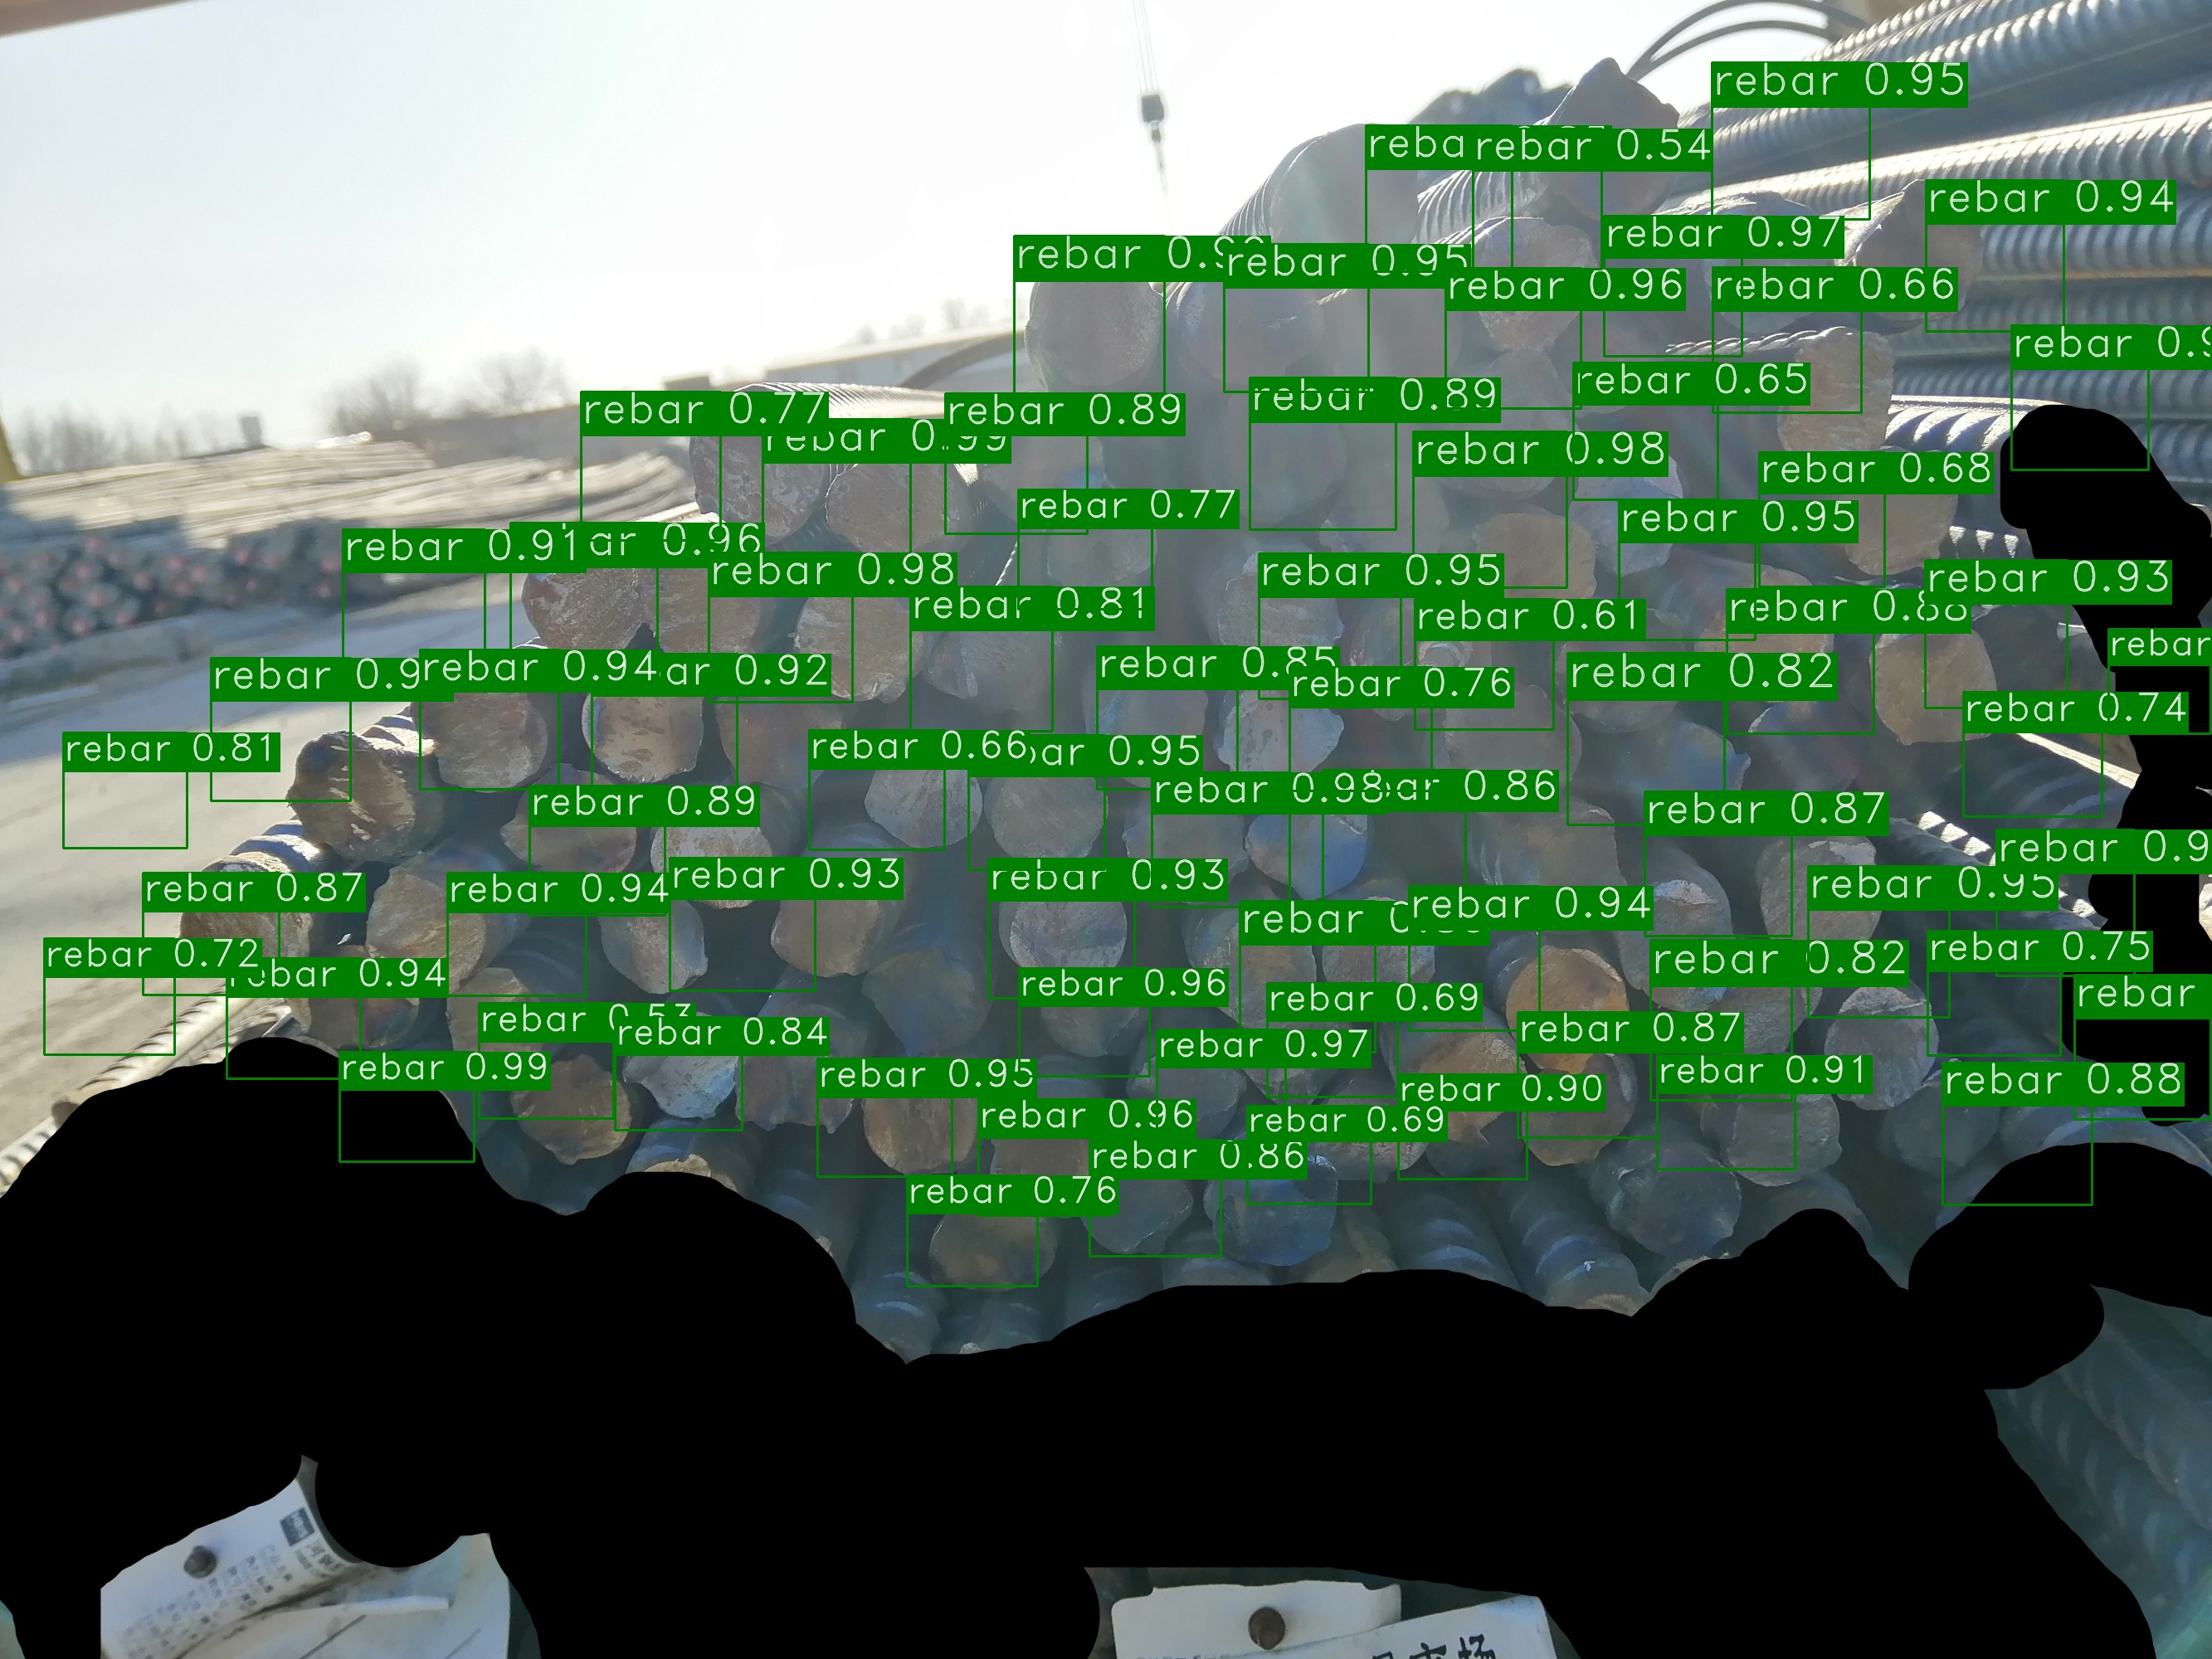


In [11]:
import numpy as np
result_rec = []
f = open('./output/myresult.txt', 'a')
for dt in np.array(result):
    score = dt['score']
    if score < 0.6:
        continue
    result_rec.append(dt)
    f.write(str(dt) + '\n')
f.close() 

# 4 误差分析

In [12]:
import os
import os.path as osp
import paddlex as paddlex
print(os.path)

model_dir = './output/YOLO3_DARKNET53/best_model/'
save_dir = 'visualize/YOLO3_DARKNET53/ErrorAnay/'
if not osp.exists(save_dir):
    os.makedirs(save_dir)

eval_details_file = osp.join(model_dir, 'eval_details.json') 
paddlex.det.coco_error_analysis(eval_details_file=eval_details_file, save_dir=save_dir)

<module 'posixpath' from '/opt/conda/envs/python35-paddle120-env/lib/python3.7/posixpath.py'>
creating index...
index created!
creating index...
index created!
2022-04-10 14:24:00 [INFO]	-------------create visualize/YOLO3_DARKNET53/ErrorAnay/bbox/-----------------
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=5.37s).
Accumulating evaluation results...
DONE (t=0.01s).
--------------analyzing 1-rebar---------------
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.94s).
Accumulating evaluation results...
DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.91s).
Accumulating evaluation results...
DONE (t=0.01s).
2022-04-10 14:24:11 [INFO]	--------------saving 1-rebar---------------


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


2022-04-10 14:24:12 [INFO]	The analysis figures are saved in visualize/YOLO3_DARKNET53/ErrorAnay/


误差分析结果如下：
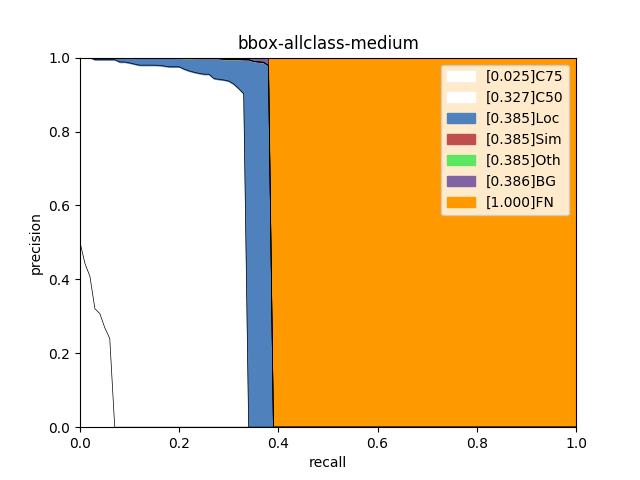

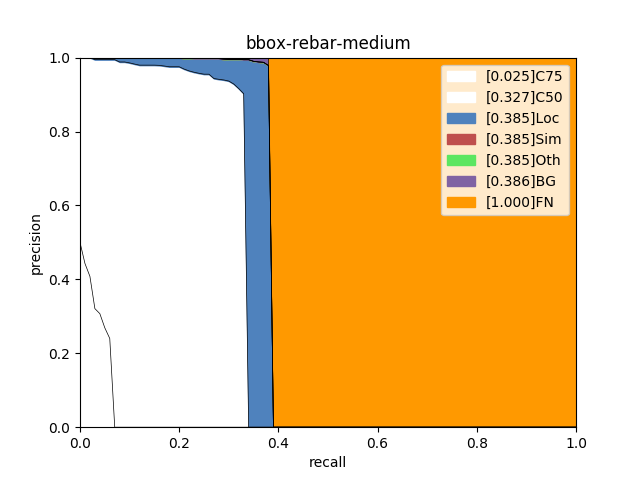

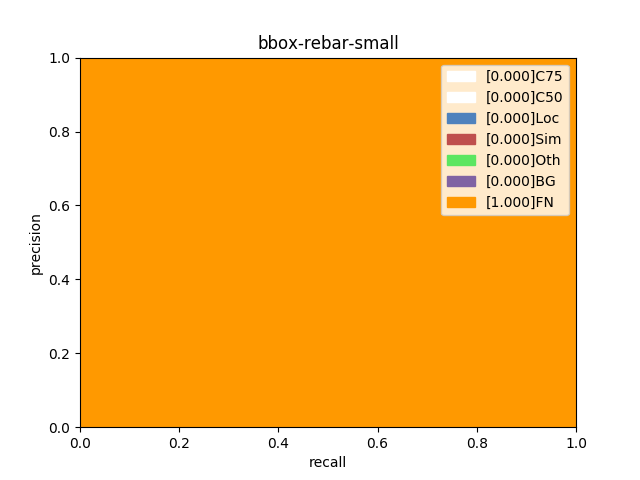

# 5 Visual DL可视化

训练过程中已经选择use_vdl=true,结果可视化示意如下：
https://aistudio.baidu.com/ibdgpu2/user/1144314/3774951/visualdl/scalar

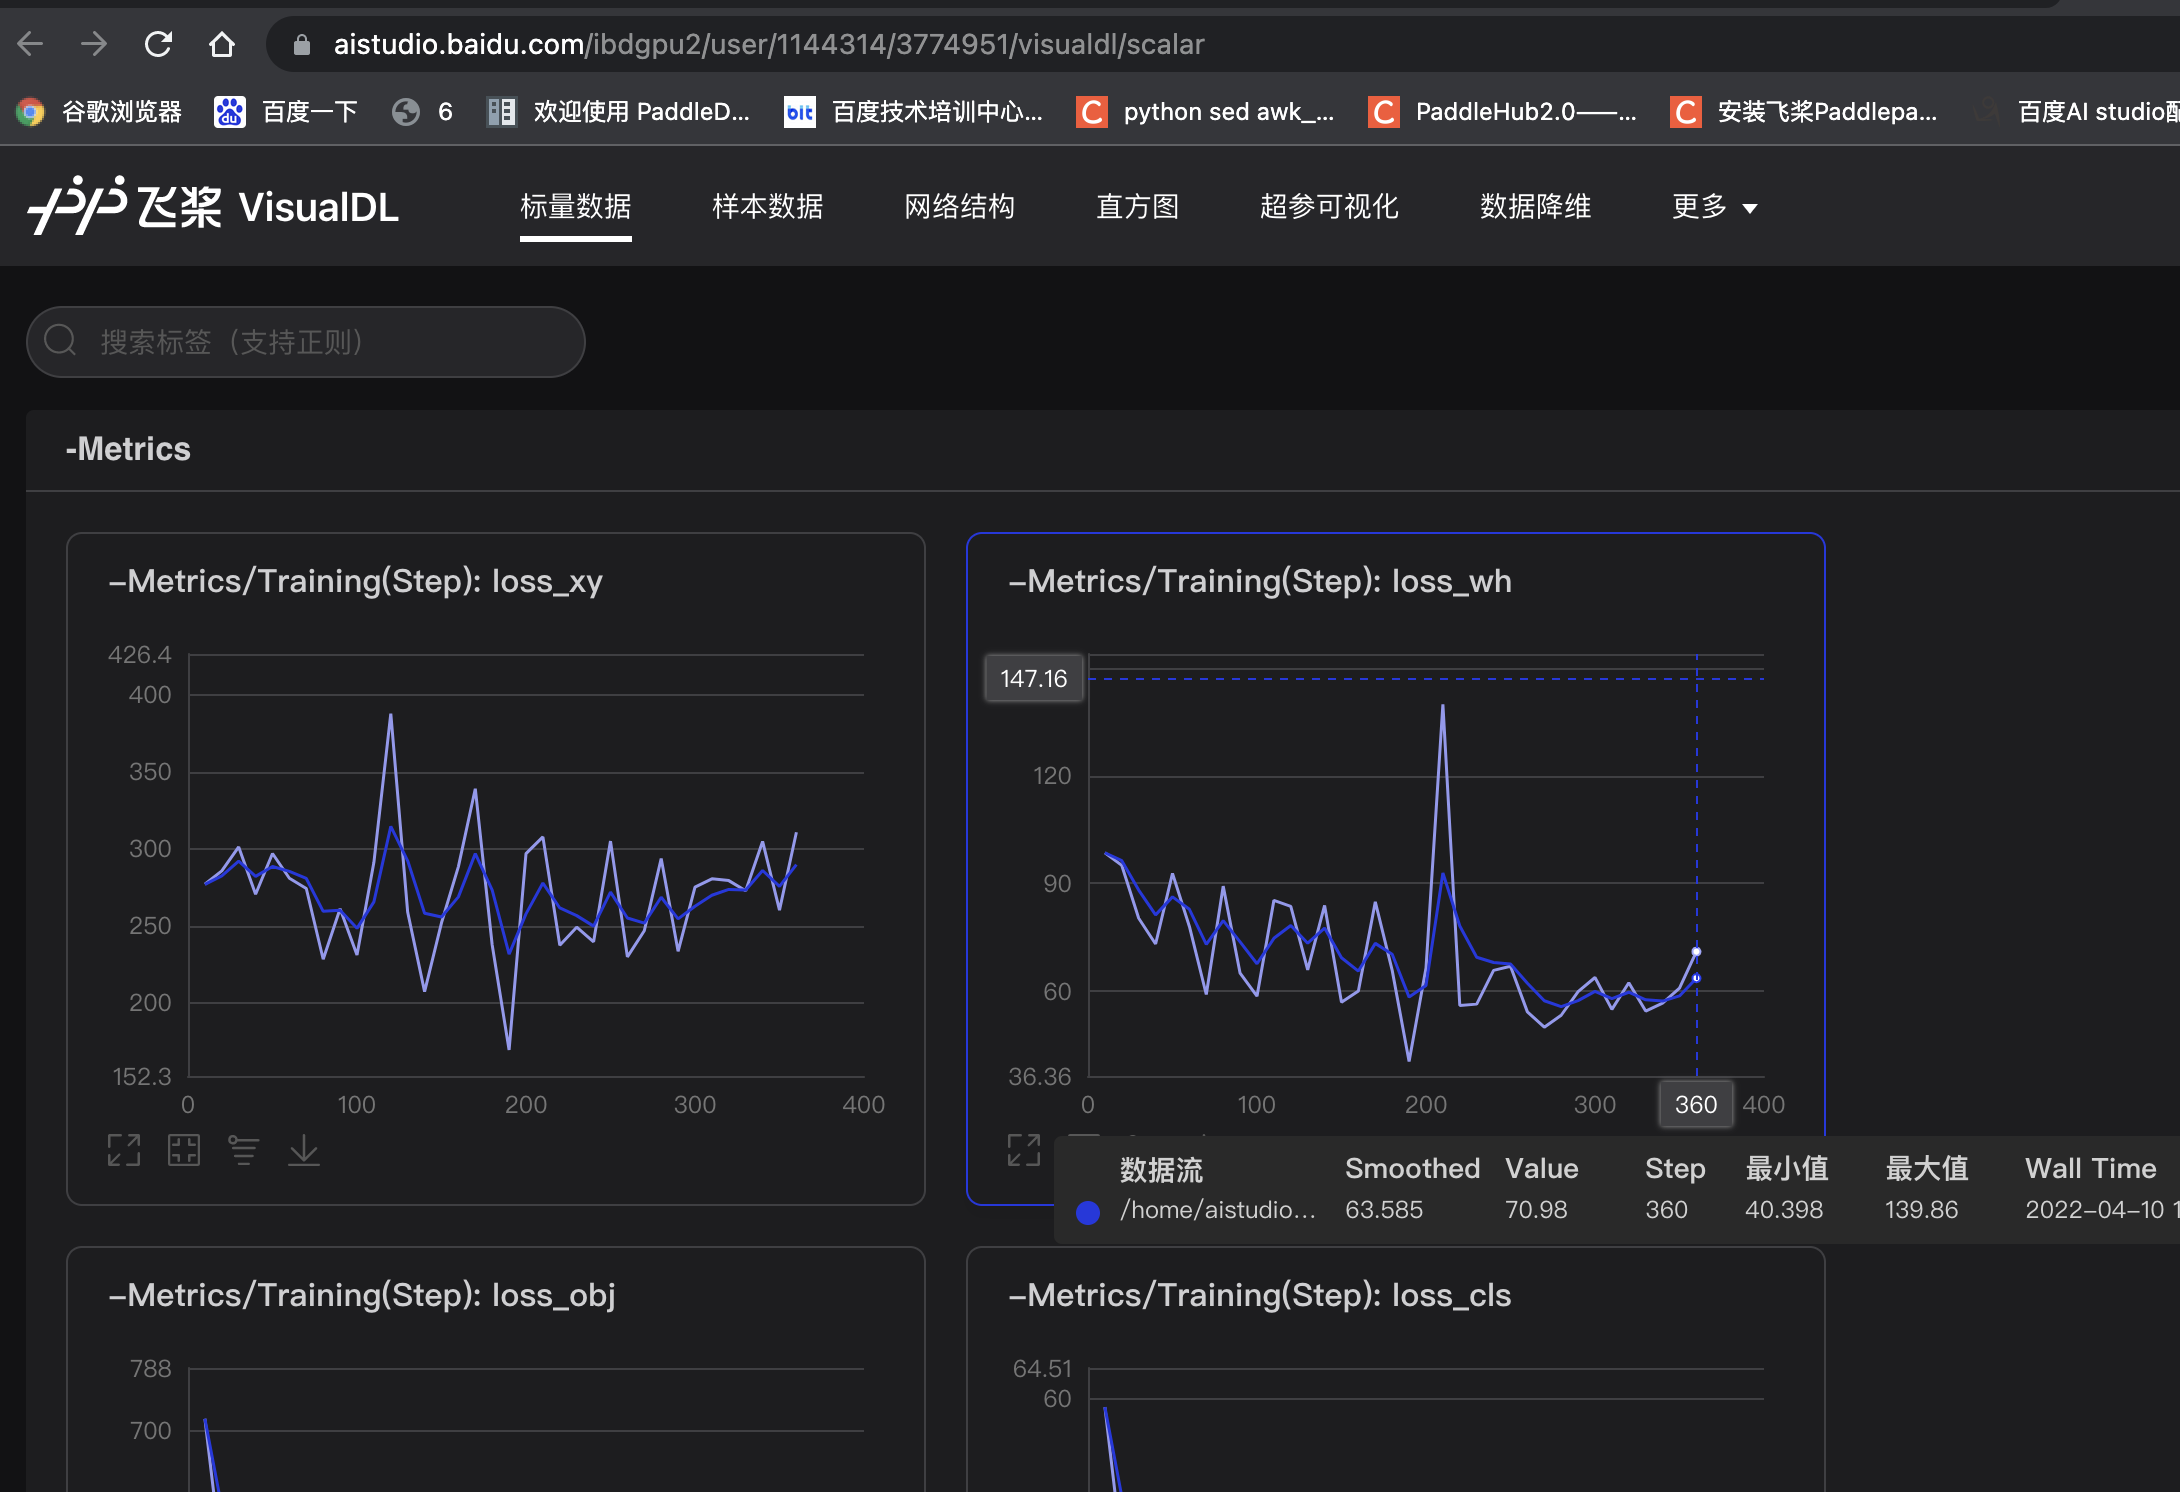